In [1]:
import sklearn
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 32)

In [88]:
df_case = pd.read_csv("/work/time_series_covid19_confirmed_global.csv", sep = ',')

In [89]:
df_case =df_case.drop(['Lat', 'Long'],axis=1)
df_case =df_case.drop(['Province/State'],axis=1)

In [90]:
df_case = df_case.groupby(['Country/Region']).sum()

In [91]:
df_case

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,...,3030,3090,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,299736,300387,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6414,6426,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613


In [92]:
df_case = df_case.T.reset_index().reindex()
df_case =df_case.dropna()
df_case =df_case.rename(columns = {'index':'Date'}, inplace = True)

In [94]:
df_case

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,...,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2,1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
3,1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
4,1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,...,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,5/16/21,63484,132015,125311,13510,30637,1241,3307285,220860,29978,637097,329843,11024,200977,780159,3967,...,326572,5117374,32940846,42779,2210375,546182,4466589,240512,96670,4,215301,4212,303827,6543,92436,38560
481,5/17/21,63598,132032,125485,13555,30787,1251,3335965,220927,29983,637573,330269,11225,202556,780857,3968,...,327473,5127548,32969512,42859,2212635,547411,4468582,242906,96893,4,216415,4359,304074,6568,92460,38572
482,5/18/21,63819,132071,125693,13569,31045,1251,3371508,221139,29992,638155,330701,11278,204524,782129,3972,...,328528,5139485,32997331,42930,2216856,548681,4466220,246026,97068,4,217603,4512,304074,6586,92520,38595
483,5/19/21,64122,132095,125896,13569,31438,1252,3411160,221368,29995,639054,331040,11321,206878,783737,3975,...,329925,5151038,33026624,43094,2222115,550029,4468366,249365,97280,4,218814,4720,304532,6593,92630,38612


<AxesSubplot:>

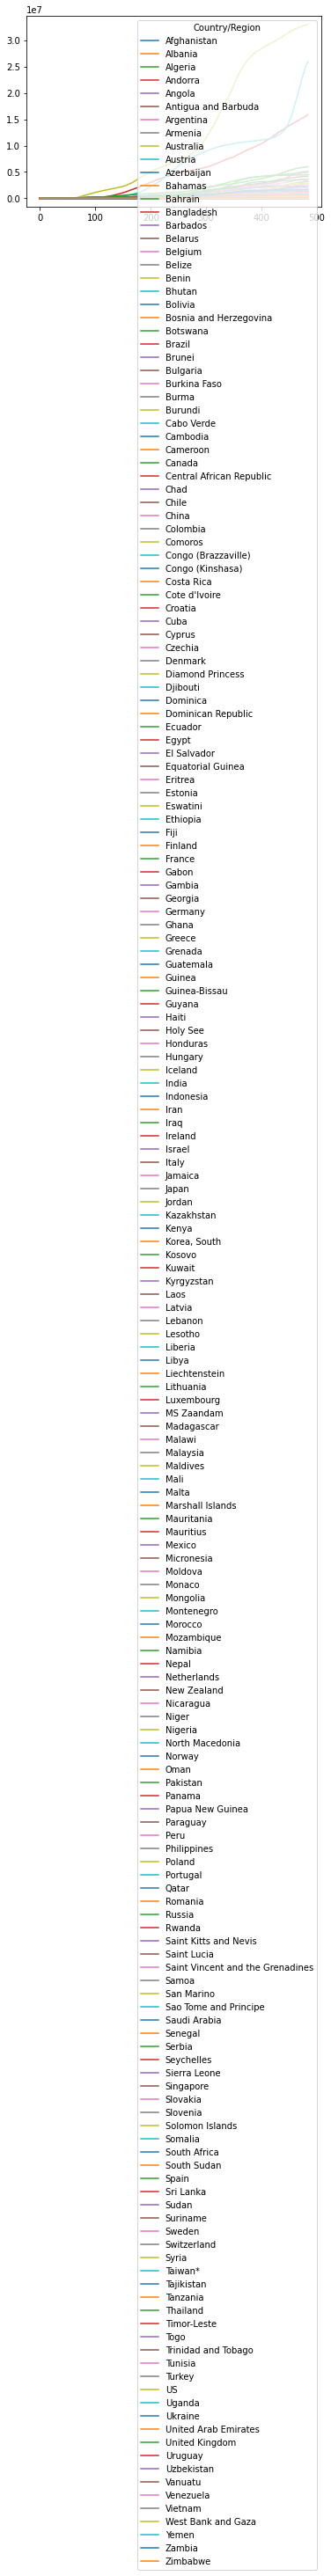

In [98]:
df_case.plot()

alt.Chart(...)

In [17]:
df_deaths = pd.read_csv("time_series_covid19_deaths_global.csv", sep=",")

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,...,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,...,2654,2664,2673,2683,2686,2698,2710,2713,2721,2730,2733,2742,2745,2751,2762,2772
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,...,2403,2406,2408,2411,2412,2416,2420,2423,2426,2427,2429,2432,2435,2436,2438,2440
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,...,3299,3307,3315,3321,3328,3335,3343,3350,3355,3360,3366,3374,3381,3388,3395,3401
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,...,618,622,628,630,633,636,639,645,649,651,655,659,677,685,696,704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35,36,37,37,37,37,39
271,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,...,3317,3326,3338,3351,3358,3378,3393,3401,3401,3401,3423,3428,3437,3437,3448,3448
272,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,...,1260,1265,1269,1270,1271,1275,1276,1277,1278,1285,1285,1289,1294,1297,1298,1301
273,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,...,1255,1256,1256,1257,1257,1257,1258,1259,1260,1260,1260,1260,1261,1263,1263,1265


In [48]:
print(df_deaths.shape)

(275, 486)


In [50]:
df_deaths = df_deaths.T.reset_index().reindex()
df_deaths =df_deaths.dropna()


In [53]:
df_deaths

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274
0,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,Australia,Australia,Australia,Australia,Australia,...,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1,1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,5/16/21,2742,2432,3374,127,659,33,70522,4323,3,54,0,7,4,13,820,...,0,94,29,1,0,17,127679,3459,668,1,2396,37,3428,1289,1260,1582
482,5/17/21,2745,2435,3381,127,677,42,71027,4333,3,54,0,7,4,13,820,...,0,94,29,1,0,17,127684,3521,670,1,2411,37,3437,1294,1261,1582
483,5/18/21,2751,2436,3388,127,685,42,71771,4346,3,54,0,7,4,13,820,...,0,94,29,1,0,17,127691,3578,672,1,2428,37,3437,1297,1263,1583
484,5/19/21,2762,2438,3395,127,696,42,72265,4357,3,54,0,7,4,13,820,...,0,94,29,1,0,17,127694,3638,674,1,2446,37,3448,1298,1263,1583


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bd60d03a-db64-4677-8bae-b34446c50252' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>